# Get Model Report

In [220]:
# write the function to get any model from joblib and print the accuracy score and classification report
def get_model_report(model_name):
    #import DataFetcher class from file heart_data.py
    import DataFetcher #importing the file DataFetcher.py from the folder data
    data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
    X_train = data_fetcher.get_X_train()
    X_test = data_fetcher.get_X_test()
    y_train = data_fetcher.get_y_train()
    y_test = data_fetcher.get_y_test()
    features = data_fetcher.get_features()
    target_names = data_fetcher.get_target_names()
    X = data_fetcher.get_X()
    y = data_fetcher.get_y()

    import joblib
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, average_precision_score, recall_score, precision_score, f1_score
    model = joblib.load(model_name)
    if model_name == 'joblib_dump\KNN.pkl' or model_name == 'joblib_dump\SVM.pkl' or model_name == 'joblib_dump\LRC.pkl':
        #scaling the data for KNN, SVM and Logistic Regression
        from sklearn.preprocessing import StandardScaler 
        scaler = StandardScaler() 
        scaler.fit(X_train) #fitting the scaler to the training set.
        X_train = scaler.transform(X_train) #transforming the training set. 
        X_test = scaler.transform(X_test) #transforming the testing set.
        #predict
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[::,1]
    else:
        #predict
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[::,1]

    print("----------------------------", model_name[-7:-4]," Metrics----------------------------\n")
    print("1. Accuracy Score: ", accuracy_score(y_test, y_pred).round(2))
    print("2. Precision Score: ", precision_score(y_test, y_pred).round(2))
    print("3. Recall Score: ", recall_score(y_test, y_pred).round(2))
    print("4. F1 Score: ", f1_score(y_test, y_pred).round(2), "\n")
    print("5. Classification Report: \n", classification_report(y_test, y_pred, target_names=target_names), "\n")
    print("6. Confusion Matrix: \n", confusion_matrix(y_test, y_pred), "\n")
    print("7. ROC AUC Score: ", roc_auc_score(y_test, y_pred_proba).round(2), "\n")
    print("8. PRC AUC Score: ", average_precision_score(y_test, y_pred_proba).round(2), "\n")
    return model

# ROC Combined

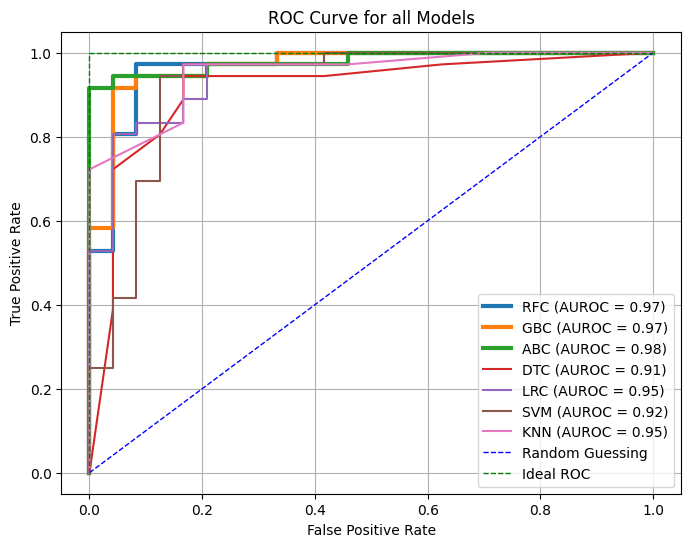

In [221]:
#import DataFetcher class from file heart_data.py
import DataFetcher #importing the file DataFetcher.py from the folder data
data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
X_train = data_fetcher.get_X_train()
X_test = data_fetcher.get_X_test()
y_train = data_fetcher.get_y_train()
y_test = data_fetcher.get_y_test()
features = data_fetcher.get_features()
target_names = data_fetcher.get_target_names()
X = data_fetcher.get_X()
y = data_fetcher.get_y()

#plot roc curve for the model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import joblib

plt.figure(figsize=(8,6))
#plot the roc curve for all models
for model_name in ['joblib_dump\RFC.pkl', 'joblib_dump\GBC.pkl', 'joblib_dump\ABC.pkl', 'joblib_dump\DTC.pkl', 'joblib_dump\LRC.pkl', 'joblib_dump\SVM.pkl', 'joblib_dump\KNN.pkl']:
    model = joblib.load(model_name)
    if model_name == 'joblib_dump\KNN.pkl' or model_name == 'joblib_dump\SVM.pkl' or model_name == 'joblib_dump\LRC.pkl':
        #scaling the data for KNN, SVM and Logistic Regression
        from sklearn.preprocessing import StandardScaler 
        scaler = StandardScaler() 
        scaler.fit(X_train) #fitting the scaler to the training set.
        X_train = scaler.transform(X_train) #transforming the training set. 
        X_test = scaler.transform(X_test) #transforming the testing set.
        y_pred_proba = model.predict_proba(X_test)[::,1] #get the probability of the positive class. [::,1] means get the second column of the array
        fpr, tpr, _ = roc_curve(y_test,  y_pred_proba) # _ is a placeholder for the threshold values
        auc = roc_auc_score(y_test, y_pred_proba).round(2) #round the auc score to 2 decimal places
        plt.plot(fpr,tpr, label=(str(model_name[-7:-4])+" (AUROC = %0.2f)") % auc, linewidth = 1.5)
    else:
        y_pred_proba = model.predict_proba(X_test)[::,1] #get the probability of the positive class. [::,1] means get the second column of the array
        fpr, tpr, _ = roc_curve(y_test,  y_pred_proba) # _ is a placeholder for the threshold values
        auc = roc_auc_score(y_test, y_pred_proba).round(2) #round the auc score to 2 decimal places
        if model_name == 'joblib_dump\RFC.pkl' or model_name == 'joblib_dump\GBC.pkl' or model_name == 'joblib_dump\ABC.pkl':
            linewidth = 3
        else:
            linewidth = 1.5
        plt.plot(fpr,tpr, label=(str(model_name[-7:-4])+" (AUROC = %0.2f)") % auc, linewidth = linewidth)


#plot the random guessing line and the ideal roc line
plt.plot([0,1],[0,1],"b--", linewidth = 1, label = "Random Guessing")
plt.plot([0,1],[1,1], "g--", linewidth = 1, label = "Ideal ROC")
plt.plot([0,0],[0,1], "g--", linewidth = 1)

#set up the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for all Models")
plt.legend(loc="best")
plt.grid(True)
plt.show()


# PRC Combined

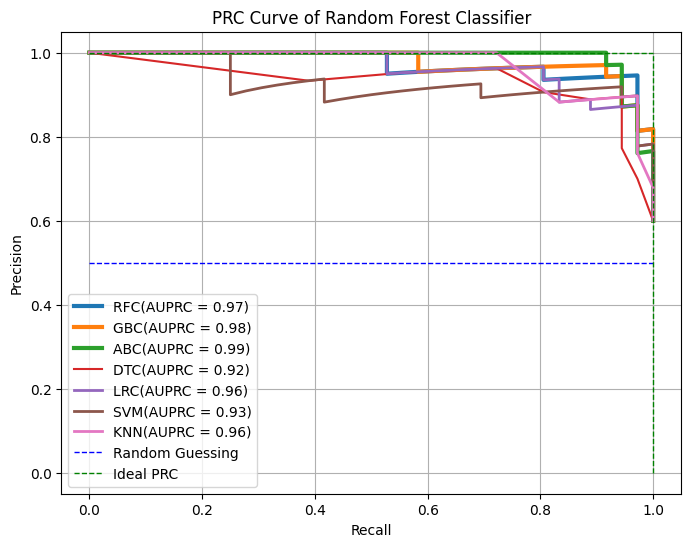

In [222]:
#import fresh data
#import DataFetcher class from file heart_data.py
import DataFetcher #importing the file DataFetcher.py from the folder data
data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
X_train = data_fetcher.get_X_train()
X_test = data_fetcher.get_X_test()
y_train = data_fetcher.get_y_train()
y_test = data_fetcher.get_y_test()
features = data_fetcher.get_features()
target_names = data_fetcher.get_target_names()
X = data_fetcher.get_X()
y = data_fetcher.get_y()

#plot precision recall curve for the all models
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
import joblib

plt.figure(figsize=(8,6))
#plot the precision recall curve for all models
for model_name in ['joblib_dump\RFC.pkl', 'joblib_dump\GBC.pkl', 'joblib_dump\ABC.pkl', 'joblib_dump\DTC.pkl', 'joblib_dump\LRC.pkl', 'joblib_dump\SVM.pkl', 'joblib_dump\KNN.pkl']:
    model = joblib.load(model_name)
    if model_name == 'joblib_dump\KNN.pkl' or model_name == 'joblib_dump\SVM.pkl' or model_name == 'joblib_dump\LRC.pkl':
        #scaling the data for KNN, SVM and Logistic Regression
        from sklearn.preprocessing import StandardScaler 
        scaler = StandardScaler() 
        scaler.fit(X_train) #fitting the scaler to the training set.
        X_train = scaler.transform(X_train) #transforming the training set. 
        X_test = scaler.transform(X_test) #transforming the testing set.
        y_pred_proba = model.predict_proba(X_test)[::,1] #get the probability of the positive class.
        #plot the PRC curve
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)  # _ is a placeholder for the threshold values
        average_precision = average_precision_score(y_test, y_pred_proba).round(2)
        plt.plot(recall, precision, label=str(model_name[-7:-4])+"(AUPRC = %0.2f)" % average_precision, linewidth = 2)
        #average precision is the area under the PRC curve
    else:
        y_pred_proba = model.predict_proba(X_test)[::,1] #get the probability of the positive class.
        #plot the PRC curve
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)  # _ is a placeholder for the threshold values
        average_precision = average_precision_score(y_test, y_pred_proba).round(2)
        if model_name == 'joblib_dump\RFC.pkl' or model_name == 'joblib_dump\GBC.pkl' or model_name == 'joblib_dump\ABC.pkl':
            linewidth = 3
        else:
            linewidth = 1.5
        plt.plot(recall, precision, label=str(model_name[-7:-4])+"(AUPRC = %0.2f)" % average_precision, linewidth = linewidth)
        #average precision is the area under the PRC curve

#plot the ideal PRC curve and random guessing PRC curve
plt.plot([0,1],[0.5,0.5],"b--", linewidth = 1, label = "Random Guessing")
plt.plot([0,1],[1,1], "g--", linewidth = 1, label = "Ideal PRC")
plt.plot([1,1],[0,1], "g--", linewidth = 1)

#set up the plot
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC Curve of Random Forest Classifier")
plt.legend(loc = "best")
plt.grid(True)
plt.show()


# Report of Models

## 1. Random Forest

In [223]:
get_model_report('joblib_dump\RFC.pkl')

---------------------------- RFC  Metrics----------------------------

1. Accuracy Score:  0.95
2. Precision Score:  0.95
3. Recall Score:  0.97
4. F1 Score:  0.96 

5. Classification Report: 
               precision    recall  f1-score   support

    diseased       0.96      0.92      0.94        24
non_diseased       0.95      0.97      0.96        36

    accuracy                           0.95        60
   macro avg       0.95      0.94      0.95        60
weighted avg       0.95      0.95      0.95        60
 

6. Confusion Matrix: 
 [[22  2]
 [ 1 35]] 

7. ROC AUC Score:  0.97 

8. PRC AUC Score:  0.97 



RandomForestClassifier(max_depth=2, min_samples_leaf=8, min_samples_split=4,
                       n_estimators=1000, random_state=42)

## 2. Ada Boost

In [224]:
get_model_report('joblib_dump\ABC.pkl')

---------------------------- ABC  Metrics----------------------------

1. Accuracy Score:  0.93
2. Precision Score:  0.94
3. Recall Score:  0.94
4. F1 Score:  0.94 

5. Classification Report: 
               precision    recall  f1-score   support

    diseased       0.92      0.92      0.92        24
non_diseased       0.94      0.94      0.94        36

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60
 

6. Confusion Matrix: 
 [[22  2]
 [ 2 34]] 

7. ROC AUC Score:  0.98 

8. PRC AUC Score:  0.99 



AdaBoostClassifier(learning_rate=0.01, n_estimators=600, random_state=42)

## 3. Gradient Boosting

In [225]:
get_model_report('joblib_dump\GBC.pkl')

---------------------------- GBC  Metrics----------------------------

1. Accuracy Score:  0.9
2. Precision Score:  0.88
3. Recall Score:  0.97
4. F1 Score:  0.92 

5. Classification Report: 
               precision    recall  f1-score   support

    diseased       0.95      0.79      0.86        24
non_diseased       0.88      0.97      0.92        36

    accuracy                           0.90        60
   macro avg       0.91      0.88      0.89        60
weighted avg       0.90      0.90      0.90        60
 

6. Confusion Matrix: 
 [[19  5]
 [ 1 35]] 

7. ROC AUC Score:  0.97 

8. PRC AUC Score:  0.98 



GradientBoostingClassifier(learning_rate=0.01, max_depth=1, max_features='sqrt',
                           random_state=42, subsample=0.5)

## 4. Decission Tree

In [226]:
get_model_report('joblib_dump\DTC.pkl')

---------------------------- DTC  Metrics----------------------------

1. Accuracy Score:  0.9
2. Precision Score:  0.89
3. Recall Score:  0.94
4. F1 Score:  0.92 

5. Classification Report: 
               precision    recall  f1-score   support

    diseased       0.91      0.83      0.87        24
non_diseased       0.89      0.94      0.92        36

    accuracy                           0.90        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.90      0.90      0.90        60
 

6. Confusion Matrix: 
 [[20  4]
 [ 2 34]] 

7. ROC AUC Score:  0.91 

8. PRC AUC Score:  0.92 



DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=20,
                       random_state=42)

## 5. Logistic Regression

In [227]:
get_model_report('joblib_dump\LRC.pkl')

---------------------------- LRC  Metrics----------------------------

1. Accuracy Score:  0.9
2. Precision Score:  0.88
3. Recall Score:  0.97
4. F1 Score:  0.92 

5. Classification Report: 
               precision    recall  f1-score   support

    diseased       0.95      0.79      0.86        24
non_diseased       0.88      0.97      0.92        36

    accuracy                           0.90        60
   macro avg       0.91      0.88      0.89        60
weighted avg       0.90      0.90      0.90        60
 

6. Confusion Matrix: 
 [[19  5]
 [ 1 35]] 

7. ROC AUC Score:  0.95 

8. PRC AUC Score:  0.96 



LogisticRegression(C=0.01, random_state=42, solver='liblinear')

## 6. KNN

In [228]:
get_model_report('joblib_dump\KNN.pkl')

---------------------------- KNN  Metrics----------------------------

1. Accuracy Score:  0.92
2. Precision Score:  0.9
3. Recall Score:  0.97
4. F1 Score:  0.93 

5. Classification Report: 
               precision    recall  f1-score   support

    diseased       0.95      0.83      0.89        24
non_diseased       0.90      0.97      0.93        36

    accuracy                           0.92        60
   macro avg       0.92      0.90      0.91        60
weighted avg       0.92      0.92      0.92        60
 

6. Confusion Matrix: 
 [[20  4]
 [ 1 35]] 

7. ROC AUC Score:  0.95 

8. PRC AUC Score:  0.96 



KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, n_neighbors=9)

## 7. SVM

In [229]:
get_model_report('joblib_dump\SVM.pkl')

---------------------------- SVM  Metrics----------------------------

1. Accuracy Score:  0.92
2. Precision Score:  0.9
3. Recall Score:  0.97
4. F1 Score:  0.93 

5. Classification Report: 
               precision    recall  f1-score   support

    diseased       0.95      0.83      0.89        24
non_diseased       0.90      0.97      0.93        36

    accuracy                           0.92        60
   macro avg       0.92      0.90      0.91        60
weighted avg       0.92      0.92      0.92        60
 

6. Confusion Matrix: 
 [[20  4]
 [ 1 35]] 

7. ROC AUC Score:  0.92 

8. PRC AUC Score:  0.93 



SVC(C=1.1, gamma='auto', kernel='linear', probability=True, random_state=42)